<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

Let me start out with prefacing this, I'm a huge coffee nerd. I have 6 espresso machines, ranging from a lever operated espresso machine, where you physically pull the lever to make the shot, to a fully networked espresso machine that monitors multiple temperatures, pressures, flow rates and heater activities, at a rate of around 30hz. I love my morning coffee, and I make everything from nitro cold brew to espresso at home. So I thought it would be fun to explore this data set from the Coffee Quality Institute. 

The data can be found here:

https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi/data

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
#First things first, lets import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coffee_data = pd.read_csv("df_arabica_clean.csv")
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

Looking at this set, its faily clean with the exception of the ICO number, which may make sense as its done on an individual bag. 

In [3]:
coffee_data.columns
coffee_data.describe()

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


Taking a peek at the desribed info, I would say this all seems fairly reasonable. Standard tasting measures make sense with the elevated average as these are all small origin bags that generally carry a premium. Moisture percentage is on target, as well as the expectations for category one and two defects from grading. I find it really interesting to see that acidity and aroma are remarkably in sync as they describe two of the primary senses that often go together. 

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

Honestly, given how complete and clean this dataset is, I'm just going to remove unnecessary columns, to make it easier to handle and work with. 

In [7]:
columns_to_remove = ['ID', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Defects', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact']

# Drop the specified columns
coffee_data_clean = coffee_data.drop(columns=columns_to_remove)

column_index = 0 #Remove the first index column that isn't id

# Drop the column by index
coffee_data_clean = coffee_data_clean.drop(coffee_data_clean.columns[column_index], axis=1)


coffee_data_clean.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage,Color
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33,11.8,green
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58,10.5,blue-green
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42,10.4,yellowish
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17,11.8,green
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08,11.6,yellow-green


The irregularity in altitude I think needs to be corrected:

In [8]:
#Filter column for two integers, if only one present, set that equal to min and then set max equal to min
coffee_data_clean[['Altitude_min', 'Altitude_max']] = coffee_data_clean['Altitude'].str.extract(r'(\d+)(?:-(\d+))?').astype(str)
coffee_data_clean['Altitude_max'].fillna(coffee_data_clean['Altitude_min'], inplace=True)
coffee_data_clean.head()



,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage,Color,Altitude_min,Altitude_max
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33,11.8,green,1700,1930
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58,10.5,blue-green,1200,nan
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42,10.4,yellowish,1300,nan
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17,11.8,green,1900,nan
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08,11.6,yellow-green,1850,2100


And just to be sure, lets look at the summary stats again:

In [9]:
coffee_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country of Origin    207 non-null    object 
 1   Farm Name            205 non-null    object 
 2   Lot Number           206 non-null    object 
 3   Mill                 204 non-null    object 
 4   ICO Number           75 non-null     object 
 5   Company              207 non-null    object 
 6   Altitude             206 non-null    object 
 7   Region               205 non-null    object 
 8   Producer             206 non-null    object 
 9   Number of Bags       207 non-null    int64  
 10  Bag Weight           207 non-null    object 
 11  In-Country Partner   207 non-null    object 
 12  Harvest Year         207 non-null    object 
 13  Grading Date         207 non-null    object 
 14  Owner                207 non-null    object 
 15  Variety              201 non-null    obj

Also the process method appears to have some nans in it, so lets replace those with a label of unknown

In [10]:
coffee_data_clean['Processing Method'] = coffee_data_clean['Processing Method'].fillna('Unknown')

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



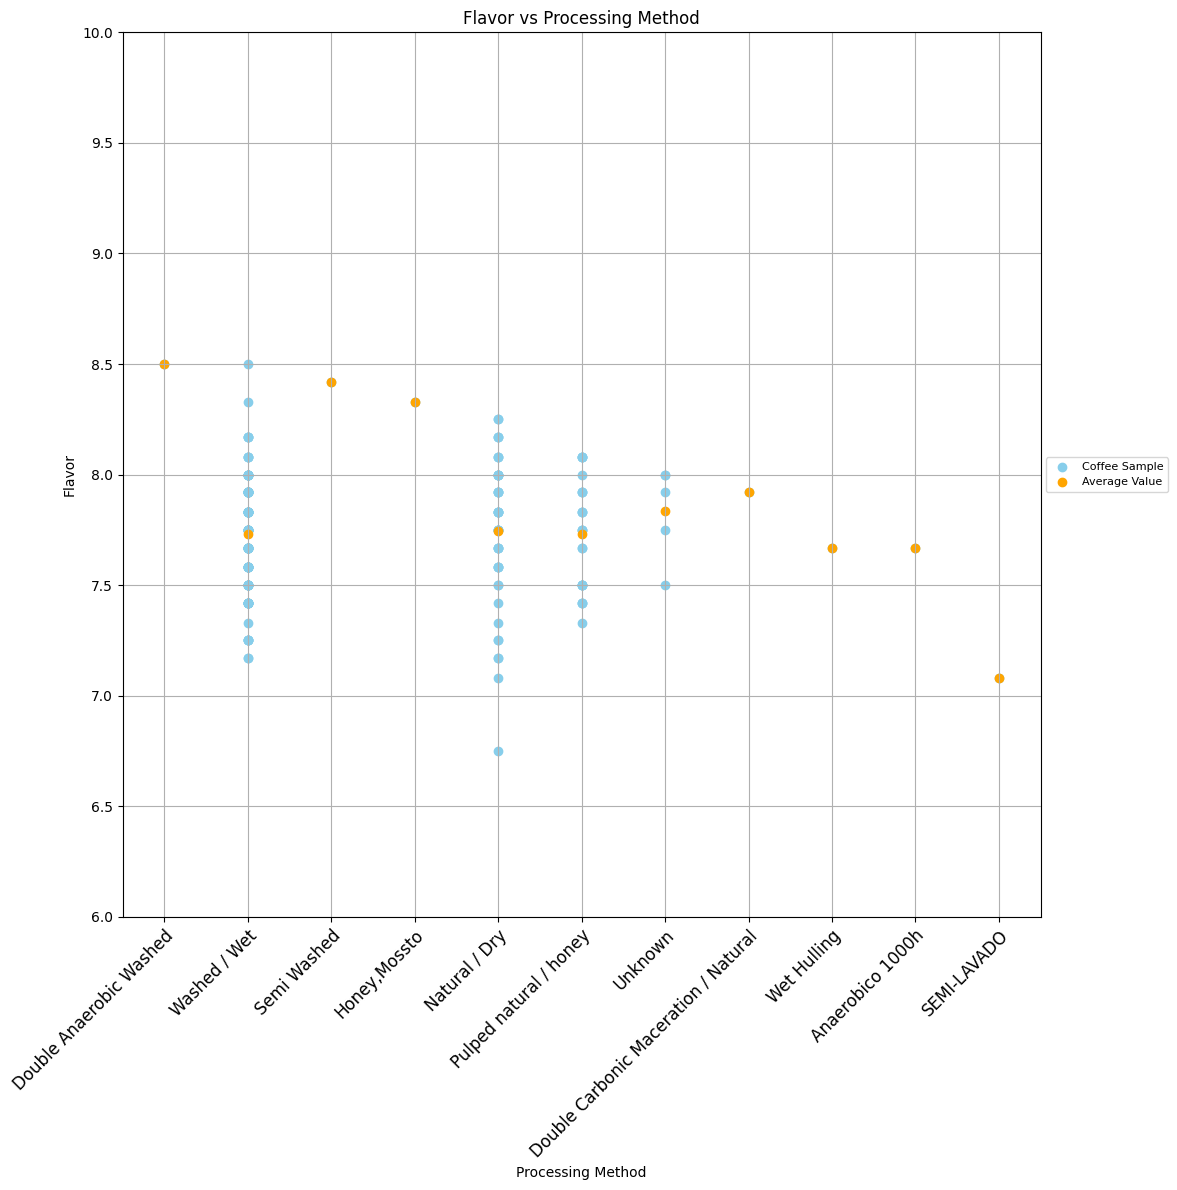

In [12]:
# Plotting
# Calculate mean flavor score df for each processing method
mean_flavor = coffee_data_clean.groupby('Processing Method')['Flavor'].mean()
method_avg_flavor_df = mean_flavor.reset_index(name='Avg Flavor Score')

# Plotting - force size
plt.figure(figsize=(12, 12))

# Scatter plot for coffee samples
plt.scatter(coffee_data_clean['Processing Method'].astype(str), coffee_data_clean['Flavor'].astype(float), color='skyblue', label='Coffee Sample')
#Add in plot for mean flavor score
plt.scatter(method_avg_flavor_df['Processing Method'].astype(str), method_avg_flavor_df['Avg Flavor Score'].astype(float), color='orange', label='Average Value')  # Added .astype(str)

# Adjusting spacing of ticks on x-axis as the text is too big
plt.xticks(rotation=45, fontsize=12, ha='right', wrap=True)

# Show legend & move its position
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.title('Flavor vs Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Flavor')
plt.grid(True)

# Set y-axis limits to a reasonable range
plt.ylim(6, 10)

# Show plot
plt.tight_layout()
plt.show()

Lets talk visualisation for this:
This visualisation acheived:
1. Use and change a legend position
2. Change a legend font size
3. Place a legend outside of the plot
4. Change the title and x/y labels
5. Modify axis text ticks/labels
6. Change size of axis labels
7. Combination of datasources onto one chart


Now lets try and recreate this in seaborn 

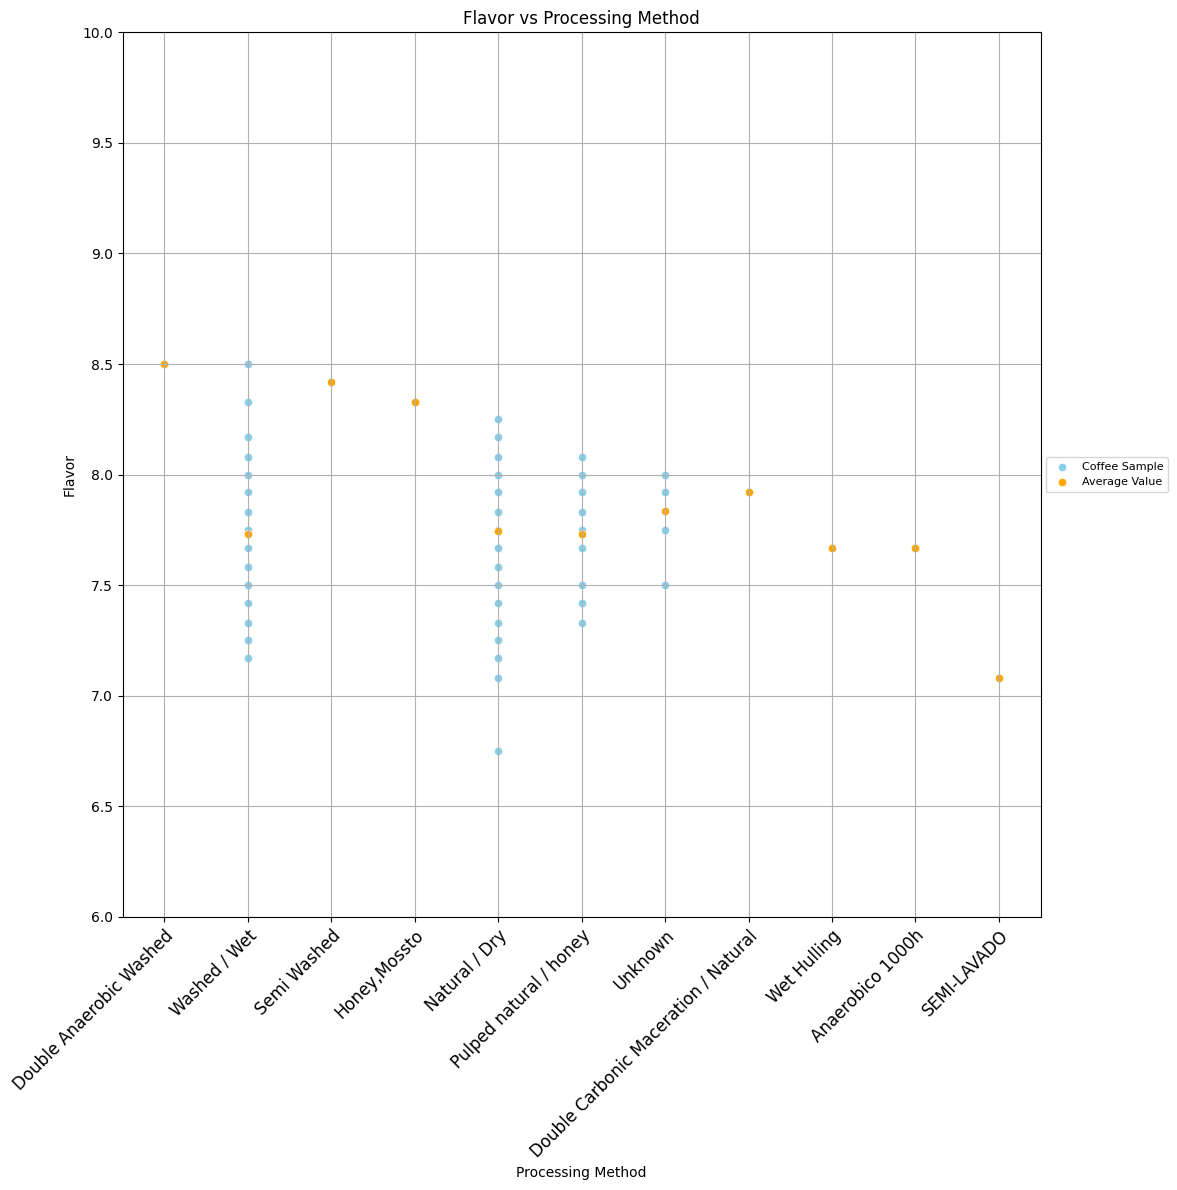

In [13]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=coffee_data_clean, x='Processing Method', y='Flavor', color='skyblue', label='Coffee Sample')

# Scatter plot for mean flavor score

sns.scatterplot(data=method_avg_flavor_df, x='Processing Method', y='Avg Flavor Score', color='orange', label='Average Value')


plt.title('Flavor vs Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Flavor')
plt.grid(True)

# Rotate x-axis labels by 45 degrees and use wrapping to prevent overlap
plt.xticks(rotation=45, fontsize=12, ha='right', wrap=True)

# Show legend & move its position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.ylim(6, 10)
plt.tight_layout()
plt.show()

In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Essentially, theres a lot of commonality between matplotlib and Seaborn as Seaborn is built on top of matplotlib, which enables easy implementation of methods between the two of them. Functionally, they offer similar capabilities, albeit with slightly different syntax, function calls, and variable naming conventions. Notably, Seaborn's integration with Pandas DataFrames stands out, as it eliminates the need for typecasting when working with data, streamlining the visualization process.

For the next item, I want to leverage Seaborn's built in functionality to look at a corr plot and see if theres anythign interesting to explore. 

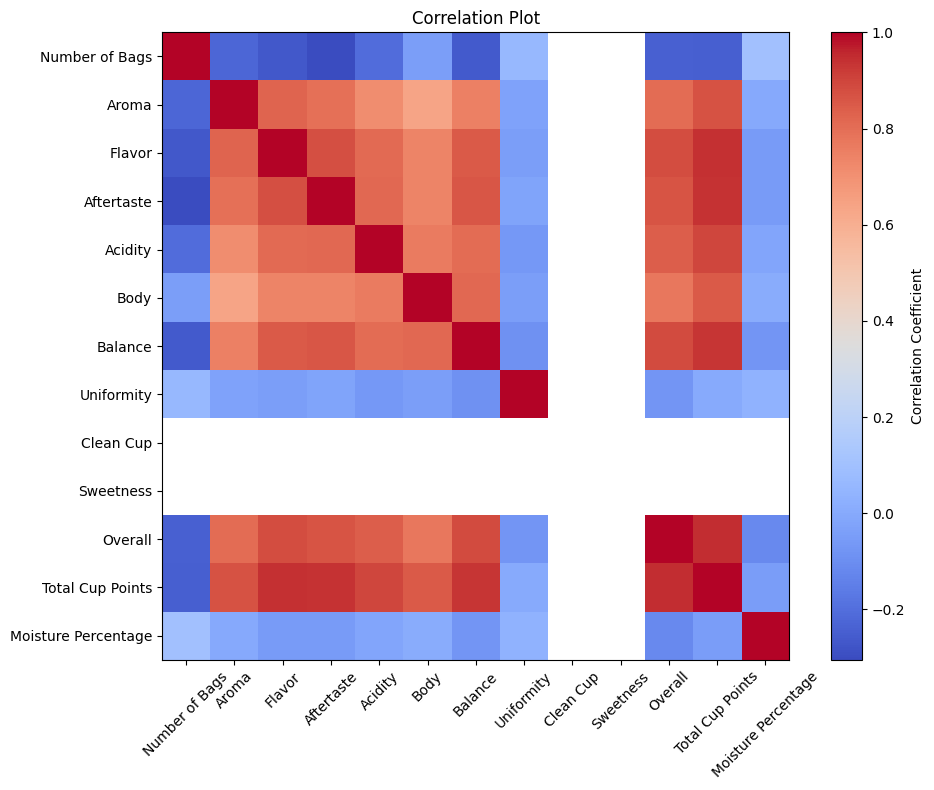

In [14]:
corr_matrix = coffee_data_clean.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Plot')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

Lets talk visualisation for this: This visualisation acheived:
1. Changing the Title
2. Adding in a color bar
3. Modify Axis Text Ticks
4. Change orientation of axis labels
5. Annotations

Now lets do the same in Seaborn:

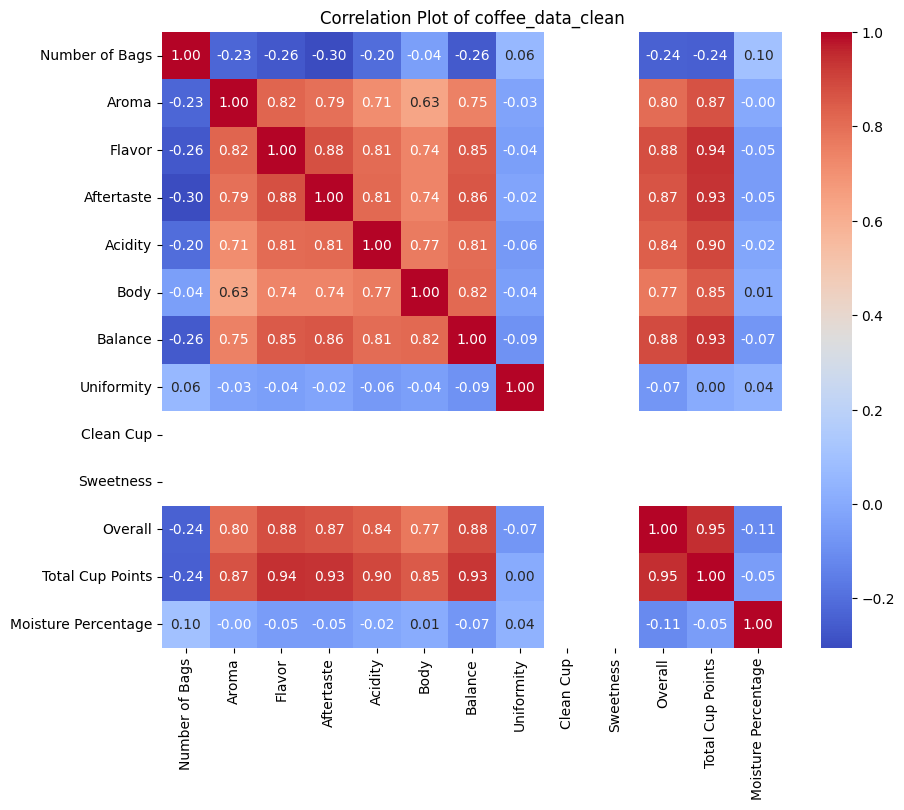

In [15]:
# Create a correlation matrix
corr_matrix = coffee_data_clean.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of coffee_data_clean')
plt.show()

Comparing the two charts, the seaborn chart requires much less overhead to instantiate, as well as its visually a lot prettier and a lot easier to understand and read. 

Looking at this, its fascinating to see what attributes impact Total Cup Points. Surprisingly, the moisture percentage of the beans seems to have minimal impact on both the experienced attributes and the total cup points. I do find it interesting that Flavor and aftertaste both appear to significantly impact overall cup points, moreso than the body of coffee. 

I really enjoyed working on this datasource as it was small enough to be able to be human ingested and understood, while also providing a lot of available rabbit holes to jump into. I really think digging into regionality coupled with preparation method could be interesting, especially as the SCA has significantly bridged out from just standard cuppings. 